Importing necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading the data and spliting between train and validation sets

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
x_train.min()

0

In [5]:
x_train.max()

255

Preprocess the data

In [6]:
x_train, x_valid = x_train / 255.0, x_valid / 255.0

Reshape images to add channel dimension

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_train.min()

0.0

In [10]:
x_train.max()

1.0

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
y_valid = y_valid.reshape(-1,)

In [14]:
classes = ["0","1","2","3","4","5","6","7","8","9"]

Let's plot some images to see what they are

In [15]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

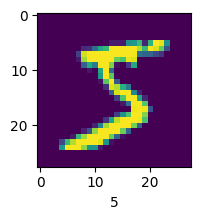

In [16]:
plot_sample(x_train, y_train, 0)

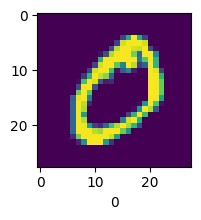

In [17]:
plot_sample(x_train, y_train, 1)

Define model architecture

In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Compile the model

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [21]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1435 - accuracy: 0.9565
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0447 - accuracy: 0.9862
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0259 - accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0203 - accuracy: 0.9933


Evaluate the model

In [22]:
model.evaluate(x_valid,y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.0341 - accuracy: 0.9892


[0.03414583578705788, 0.9891999959945679]

In [23]:
test_loss, test_acc = model.evaluate(x_valid,  y_valid, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0341 - accuracy: 0.9892 - 626ms/epoch - 2ms/step

Test accuracy: 0.9891999959945679


Make predictions

In [24]:
y_pred = model.predict(x_valid)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[7.1444894e-09, 6.8893805e-06, 4.6668547e-06, 2.5185830e-06,
        1.6151893e-06, 1.5620097e-08, 4.1862425e-12, 9.9997437e-01,
        1.1688184e-08, 9.8751070e-06],
       [1.7844646e-07, 4.2194915e-06, 9.9999559e-01, 1.7454912e-09,
        6.2858718e-10, 4.4394377e-11, 1.0178375e-08, 1.5537380e-11,
        1.3885626e-08, 5.0265204e-12],
       [2.7471056e-05, 9.9985397e-01, 3.0012452e-06, 2.5748218e-08,
        2.8785164e-05, 1.6532105e-05, 5.0015893e-05, 8.1269673e-06,
        9.0658805e-06, 3.0735168e-06],
       [9.9987245e-01, 4.8464224e-09, 5.8326822e-07, 2.2826421e-06,
        9.6910988e-08, 2.7018870e-05, 9.2872549e-05, 6.8868680e-09,
        4.1919639e-06, 4.3573093e-07],
       [3.3678205e-08, 3.2807148e-07, 2.1373116e-07, 2.9498614e-07,
        9.9959987e-01, 4.0536310e-07, 4.4471540e-07, 6.6193616e-07,
        3.3431246e-07, 3.9753519e-04]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [26]:
y_valid[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

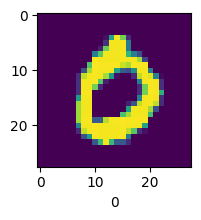

In [27]:
plot_sample(x_valid, y_valid,3)

In [28]:
classes[y_classes[3]]

'0'